# Notebook for testing the SETP-identification algorithms

In [1]:
from classes import *
#in classes, also tipping will be imported!

import matplotlib.pyplot as plt
import os
import pandas as pd
import pickle
import random
import ruptures as rpt

from tqdm.notebook import trange, tqdm

from matplotlib import patches
from matplotlib.collections import PatchCollection

In [2]:
#Load the experiments
input_path = "temp/experiments/experiment_2020_9_21.p"
output_path = os.path.dirname(input_path)
experiments = pickle.load( open( input_path, "rb" ) )
print(len(experiments))

720


In [3]:
window = 4 #The size of the rolling window
margin = 2 # The margin around the TP

#Criteria
c1 = 0.15 #fraction of change relative to house price at t0
c2 = 2e9 #variance
c3 = 10 #percent

experiments = experiments[0:100]

with tqdm(total=len(experiments)) as pbar:
    for experiment in experiments:
        experiment.create_Metrics() #TODO: GIVE CONTROL OVER THE METRICS TO BE CREATED
        for M in experiment.allMetrics:
            M.create_statistics() #Create summary statistics for the metric(t)
            #M.select_candidates(c1=c1,c2=c2,c3=c3,window=window,margin=margin) #Evaluate the three tipping point criteria
            #M.first_SETP = M.candidates['rapid change_neg'].first_valid_index() #The first year in which a rapid change is found
        pbar.update(1)
            #M.plot_both(figsize=(15,20),exp_name=experiment.name)

### Select an interesting metric to improve the signal analysis

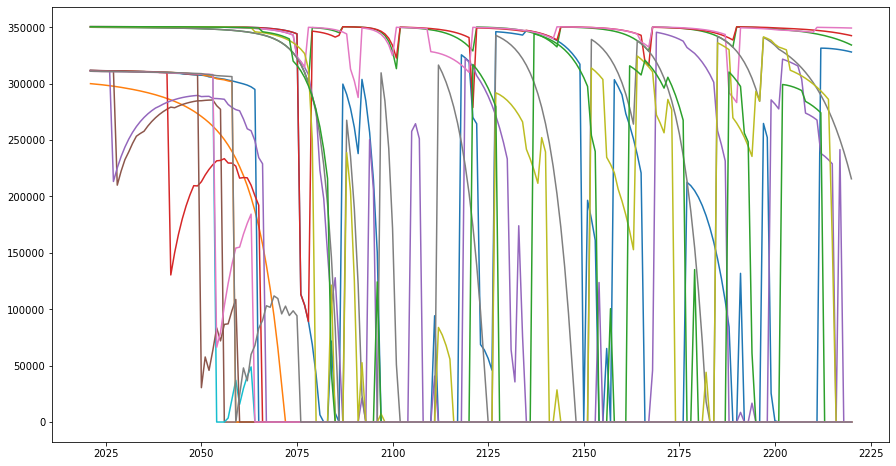

In [4]:
#Select some experiments with interesting signals
sel_experiments = sel_exp(experiments,['01','02'],'All',['R. Active','Sentiment'])

#Intereting shapes
A0_r = [1,69] #area 0 rational
A0_br = [3,5,7,9,11,15,19,45,49,59] # area 0 boundedly rational
A1_r = [1,4]
A1_br = [0,1,2,3,4,10]

M_sel = [] #List Pd Series containing interesting metrics

for i,exp in enumerate(sel_experiments):
    if i in A0_r:
        M_sel.append(exp.allMetrics[0])
    if i in A0_br:
        M_sel.append(exp.allMetrics[1])
    if i in A1_r:
        M_sel.append(exp.allMetrics[2])
    if i in A1_br:
        M_sel.append(exp.allMetrics[3])

M_sel

fig, ax = plt.subplots(figsize=(15,8))
colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']

for series in M_sel:
    series.raw.plot(ax=ax)

D:\Python\Urban-SETP\tipping.py:174: RuntimeWarning: divide by zero encountered in double_scalars
  perc_of_B = abs(100 * difference / first_house_price_stateB)


[2059__-1__real__None_]
[2059]


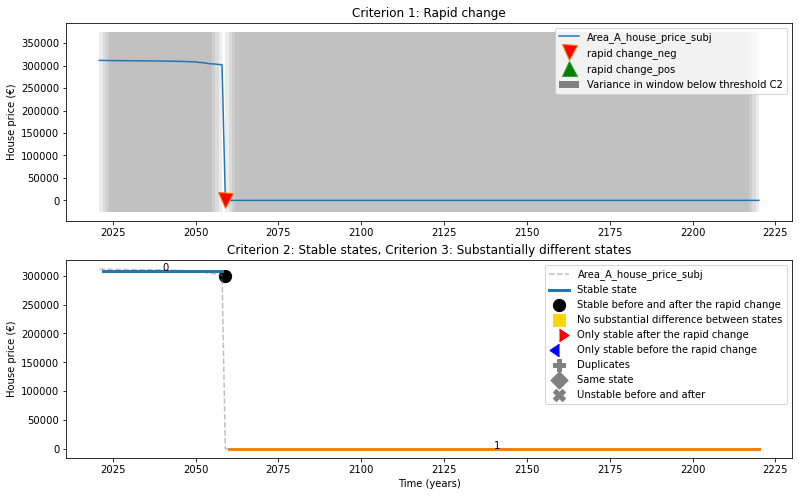

In [18]:
metric = M_sel[11]

metric.find_SETP_candidates(c1=c1,c2=c2,c3=c3, window=window,margin=margin)
print(metric.allSETPs_cands)
metric.select_SETPs(sign=-1)
print(metric.selected_SETPs)
fig, ax = metric.plot_SETPs(window=window,figsize=(13,8))

Here the algorithm works perfectly, but it also is a rather easy situation, of course.

D:\Python\Urban-SETP\tipping.py:174: RuntimeWarning: divide by zero encountered in double_scalars
  perc_of_B = abs(100 * difference / first_house_price_stateB)


[2054__-1__real__None_, 2064__-1__sw__None_]
[2054]


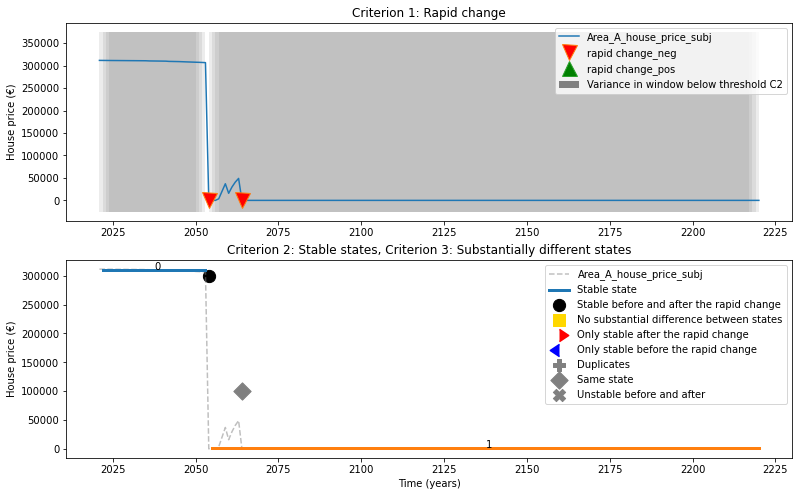

In [6]:
metric = M_sel[9]

metric.find_SETP_candidates(c1=c1,c2=c2,c3=c3, window=window,margin=margin)
print(metric.allSETPs_cands)
metric.select_SETPs(sign=-1)
print(metric.selected_SETPs)
fig, ax = metric.plot_SETPs(window=window,figsize=(13,8))

Hier detecteert hij ook netjes dat alleen de eerste situatie een shift van de ene naar de andere state is.

D:\Python\Urban-SETP\tipping.py:173: RuntimeWarning: invalid value encountered in double_scalars
  perc_of_A = abs(100 * difference / last_house_price_stateA)
D:\Python\Urban-SETP\tipping.py:174: RuntimeWarning: invalid value encountered in double_scalars
  perc_of_B = abs(100 * difference / first_house_price_stateB)
D:\Python\Urban-SETP\tipping.py:173: RuntimeWarning: divide by zero encountered in double_scalars
  perc_of_A = abs(100 * difference / last_house_price_stateA)


[2085__-1__ob__None_, 2086__-1__sw__dup_first -dups with: (2091, 2092), 2088__1__oa__None_, 2091__-1__sw__dup_, 2092__-1__sw__dup_, 2097__1__real__None_, 2100__-1__oa__dup_first -dups with: (2101), 2101__-1__oa__dup_, 2112__1__real__None_, 2127__1__oa__None_, 2152__1__real__None_, 2164__1__sw__None_, 2182__-1__oa__dup_first -dups with: (2185), 2185__1__oa__dup_, 2197__1__sw__None_]
[]


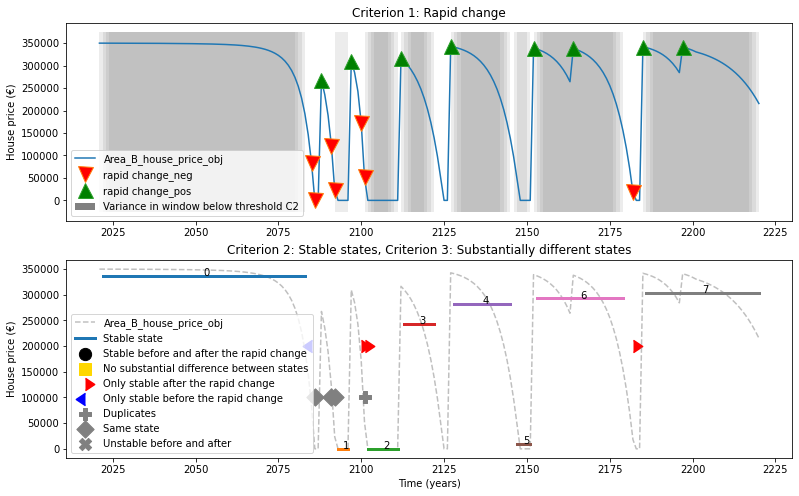

In [7]:
metric = M_sel[7]

metric.find_SETP_candidates(c1=c1,c2=c2,c3=c3, window=window,margin=margin)
print(metric.allSETPs_cands)
metric.select_SETPs(sign=-1)
print(metric.selected_SETPs)
fig, ax = metric.plot_SETPs(window=window,figsize=(13,8))

In deze situatie ziet hij geen enkel echt tipping point. Hij ziet wel een aantal situaties met een stabiele situatie voor **of** na de rapid change, maar geen situatie met stabiliteit voor **en** na de rapid change.

[2092__1__sw__dup_first -dups with: (2191), 2191__1__sw__dup_]
[]


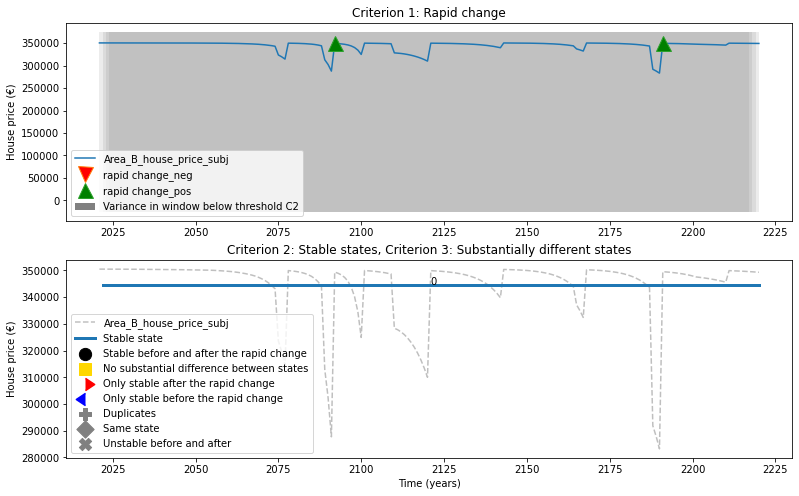

In [8]:
metric = M_sel[6]

metric.find_SETP_candidates(c1=c1,c2=c2,c3=c3, window=window,margin=margin)
print(metric.allSETPs_cands)
metric.select_SETPs(sign=-1)
print(metric.selected_SETPs)
fig, ax = metric.plot_SETPs(window=window,figsize=(13,8))

Hier zitten helemaal geen tipping points in. Wel 2x rapid change, maar alles is dezelfde state.

D:\Python\Urban-SETP\tipping.py:174: RuntimeWarning: divide by zero encountered in double_scalars
  perc_of_B = abs(100 * difference / first_house_price_stateB)


[2028__-1__real__None_, 2056__-1__real__None_]
[2028, 2056]


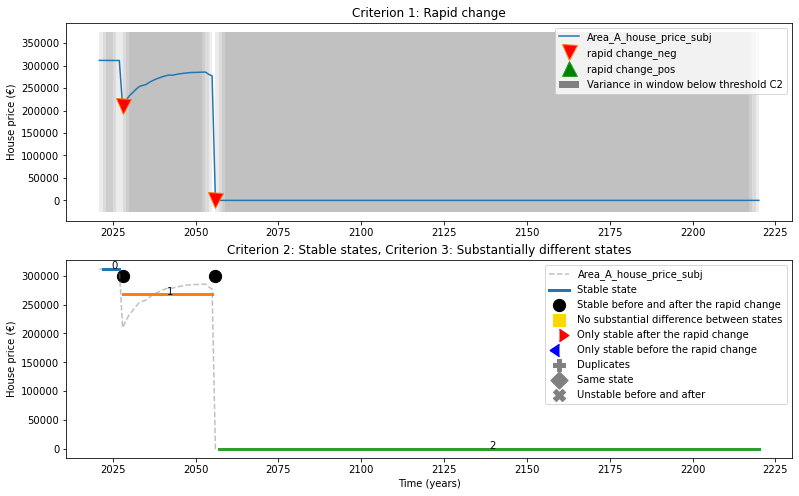

In [9]:
metric = M_sel[5]

metric.find_SETP_candidates(c1=c1,c2=c2,c3=c3, window=window,margin=margin)
print(metric.allSETPs_cands)
metric.select_SETPs(sign=-1)
print(metric.selected_SETPs)
fig, ax = metric.plot_SETPs(window=window,figsize=(13,8))

Hier twee hele duidelijke tipping points.

D:\Python\Urban-SETP\tipping.py:174: RuntimeWarning: divide by zero encountered in double_scalars
  perc_of_B = abs(100 * difference / first_house_price_stateB)
D:\Python\Urban-SETP\tipping.py:173: RuntimeWarning: invalid value encountered in double_scalars
  perc_of_A = abs(100 * difference / last_house_price_stateA)
D:\Python\Urban-SETP\tipping.py:174: RuntimeWarning: invalid value encountered in double_scalars
  perc_of_B = abs(100 * difference / first_house_price_stateB)
D:\Python\Urban-SETP\tipping.py:173: RuntimeWarning: divide by zero encountered in double_scalars
  perc_of_A = abs(100 * difference / last_house_price_stateA)


[2081__-1__real__None_, 2086__-1__oa__dup_first -dups with: (2087), 2087__-1__oa__dup_, 2094__1__real__None_, 2096__-1__oa__None_, 2105__1__real__None_, 2108__-1__oa__None_, 2119__1__real__None_, 2131__-1__real__None_, 2133__1__oa__dup_first -dups with: (2134, 2135), 2134__-1__oa__dup_, 2135__-1__oa__dup_, 2154__1__real__dup_first -dups with: (2155), 2155__-1__real__dup_, 2169__1__real__None_, 2188__-1__real__None_, 2199__1__real__None_, 2216__-1__ob__dup_first -dups with: (2217), 2217__1__ob__dup_, 2218__-1__sw__None_]
[2081, 2131, 2188, 2155]


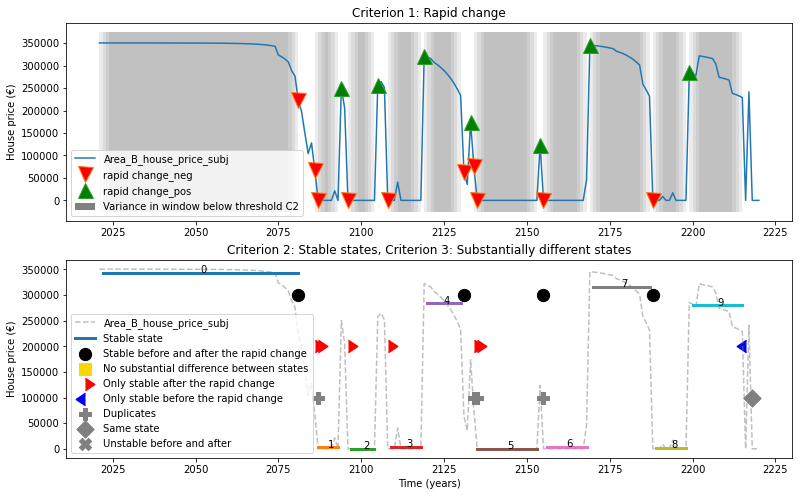

In [10]:
metric = M_sel[4]

metric.find_SETP_candidates(c1=c1,c2=c2,c3=c3, window=window,margin=margin)
print(metric.allSETPs_cands)
metric.select_SETPs(sign=-1)
print(metric.selected_SETPs)
fig, ax = metric.plot_SETPs(window=window,figsize=(13,8))

Dit gaat al best wel goed maar nog niet helemaal. De eerste is inderdaad duidelijk een tipping point. Maar de tweede en derde zijn in feite nog steeds dezelfde state shift, maar dat herkent hij niet.
Wat ook niet helemaal goed gaat: de eerste twee rode puntjes zijn zowel > maar ook +. Nu plot hij dat als beiden.

unsubstantial!!!!
[2076__-1__us__None_, 2079__1__oa__None_, 2121__-1__sw__dup_first -dups with: (2122), 2122__1__sw__dup_]
[]


(<Figure size 936x576 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DA50FE2340>,
       dtype=object))

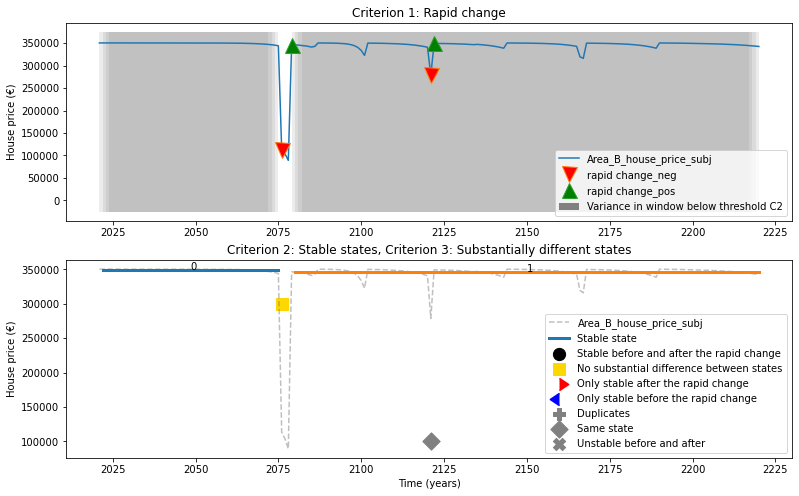

In [11]:
metric = M_sel[3]

metric.find_SETP_candidates(c1=c1,c2=c2,c3=c3, window=window,margin=margin)
print(metric.allSETPs_cands)
metric.select_SETPs(sign=-1)
print(metric.selected_SETPs)
fig, ax = metric.plot_SETPs(window=window,figsize=(13,8))

Dit is weer helemaal goed; maar hij test inderdaad nog niet op criterum 3!

[]
[]


(<Figure size 936x576 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DA517D4100>,
       dtype=object))

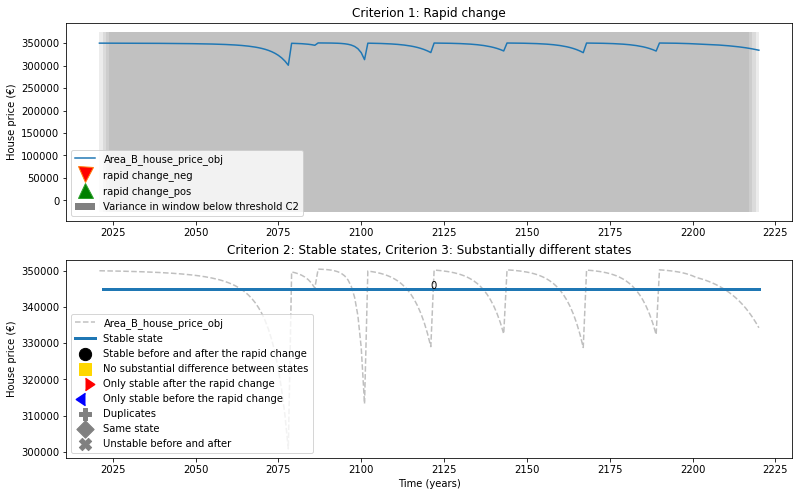

In [12]:
metric = M_sel[2]

metric.find_SETP_candidates(c1=c1,c2=c2,c3=c3, window=window,margin=margin)
print(metric.allSETPs_cands)
metric.select_SETPs(sign=-1)
print(metric.selected_SETPs)
fig, ax = metric.plot_SETPs(window=window,figsize=(13,8))

Dit ook

[2076__-1__real__None_, 2084__1__real__dup_first -dups with: (2085, 2087), 2085__-1__real__dup_, 2087__1__real__dup_, 2092__1__real__dup_first -dups with: (2096, 2097), 2096__-1__real__dup_, 2097__-1__real__dup_, 2111__1__sw__None_, 2112__-1__ob__dup_first -dups with: (2118), 2118__1__ob__dup_, 2123__-1__real__None_, 2127__1__oa__None_, 2150__-1__ob__dup_first -dups with: (2151), 2151__1__ob__dup_, 2154__-1__oa__dup_first -dups with: (2156, 2157, 2158), 2156__1__oa__dup_, 2157__-1__oa__dup_, 2158__1__oa__dup_, 2166__-1__real__None_, 2177__1__real__None_, 2189__-1__real__None_, 2191__1__sw__dup_first -dups with: (2192), 2192__-1__sw__dup_, 2197__1__real__None_, 2199__-1__oa__None_, 2212__1__real__None_]
[2076, 2123, 2166, 2189, 2085, 2096]


D:\Python\Urban-SETP\tipping.py:173: RuntimeWarning: divide by zero encountered in double_scalars
  perc_of_A = abs(100 * difference / last_house_price_stateA)
D:\Python\Urban-SETP\tipping.py:174: RuntimeWarning: divide by zero encountered in double_scalars
  perc_of_B = abs(100 * difference / first_house_price_stateB)


(<Figure size 936x576 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DA501734C0>,
       dtype=object))

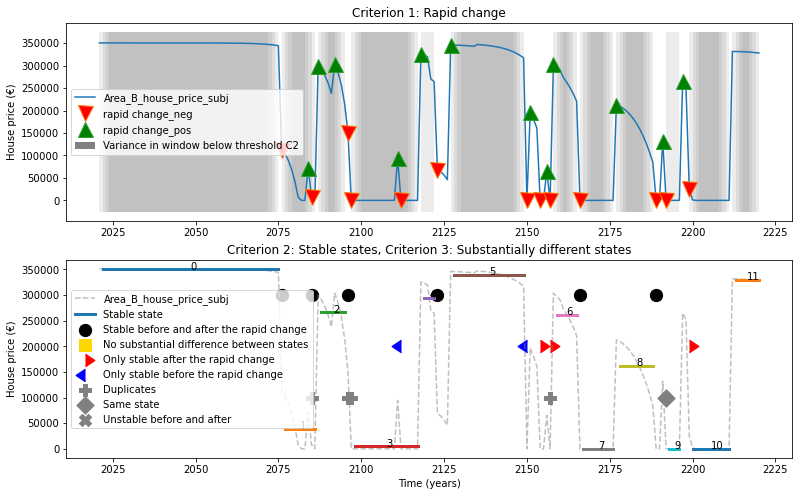

In [14]:
metric = M_sel[0]

metric.find_SETP_candidates(c1=c1,c2=c2,c3=c3, window=window,margin=margin)
print(metric.allSETPs_cands)
metric.select_SETPs(sign=-1)
print(metric.selected_SETPs)
fig, ax = metric.plot_SETPs(window=window,figsize=(13,8))

Dit zijn de complexe situaties... De eerste klopt sowieso, dat is eigenlijk het belangrijkst...

[2084__-1__real__None_, 2096__1__real__dup_first -dups with: (2097), 2097__-1__real__dup_, 2121__1__real__None_, 2128__-1__real__None_, 2137__1__real__None_, 2154__-1__ob__None_, 2157__1__oa__dup_first -dups with: (2158, 2162), 2158__-1__oa__dup_, 2162__1__oa__dup_, 2177__-1__real__None_, 2179__1__oa__dup_first -dups with: (2180), 2180__-1__oa__dup_, 2188__1__ob__None_, 2194__-1__real__dup_first -dups with: (2195), 2195__-1__real__dup_, 2202__1__real__None_, 2213__-1__real__None_]
[2084, 2128, 2177, 2194, 2213, 2097]


D:\Python\Urban-SETP\tipping.py:174: RuntimeWarning: divide by zero encountered in double_scalars
  perc_of_B = abs(100 * difference / first_house_price_stateB)
D:\Python\Urban-SETP\tipping.py:173: RuntimeWarning: invalid value encountered in double_scalars
  perc_of_A = abs(100 * difference / last_house_price_stateA)
D:\Python\Urban-SETP\tipping.py:174: RuntimeWarning: invalid value encountered in double_scalars
  perc_of_B = abs(100 * difference / first_house_price_stateB)
D:\Python\Urban-SETP\tipping.py:173: RuntimeWarning: divide by zero encountered in double_scalars
  perc_of_A = abs(100 * difference / last_house_price_stateA)


(<Figure size 936x576 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DA4F09C2B0>,
       dtype=object))

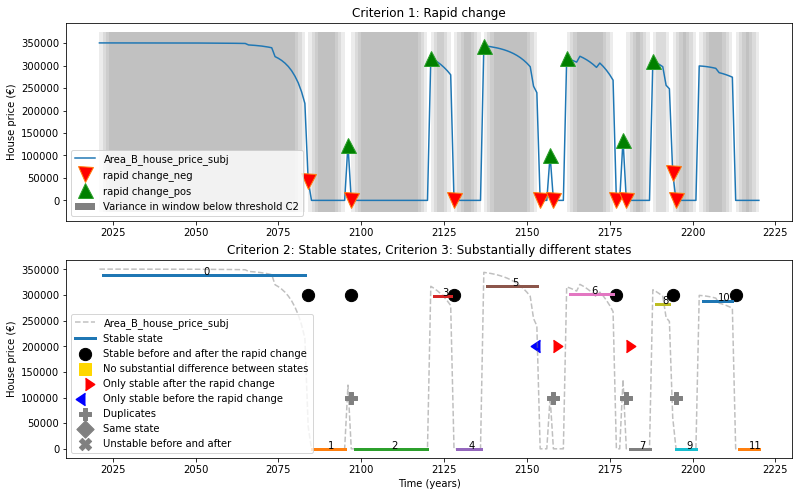

In [15]:
metric = M_sel[12]

metric.find_SETP_candidates(c1=c1,c2=c2,c3=c3, window=window,margin=margin)
print(metric.allSETPs_cands)
metric.select_SETPs(sign=-1)
print(metric.selected_SETPs)
fig, ax = metric.plot_SETPs(window=window,figsize=(13,8))

Hier gaat het ook goed.

[2042__-1__real__None_, 2066__-1__real__None_]
[2042, 2066]


D:\Python\Urban-SETP\tipping.py:174: RuntimeWarning: divide by zero encountered in double_scalars
  perc_of_B = abs(100 * difference / first_house_price_stateB)


(<Figure size 936x576 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DA4EF51700>,
       dtype=object))

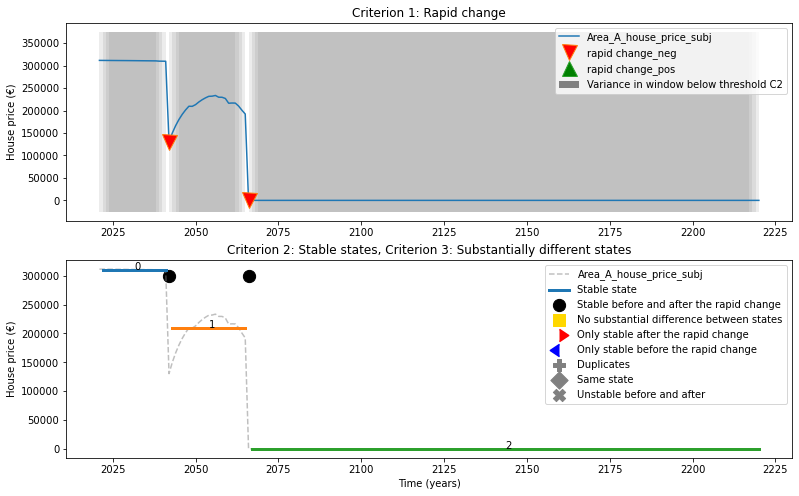

In [16]:
metric = M_sel[13]

metric.find_SETP_candidates(c1=c1,c2=c2,c3=c3, window=window,margin=margin)
print(metric.allSETPs_cands)
metric.select_SETPs(sign=-1)
print(metric.selected_SETPs)
fig, ax = metric.plot_SETPs(window=window,figsize=(13,8))

Dit is ook heel netjes.

[2050__-1__real__None_, 2060__-1__real__None_]
[2050, 2060]


D:\Python\Urban-SETP\tipping.py:173: RuntimeWarning: invalid value encountered in double_scalars
  perc_of_A = abs(100 * difference / last_house_price_stateA)
D:\Python\Urban-SETP\tipping.py:174: RuntimeWarning: invalid value encountered in double_scalars
  perc_of_B = abs(100 * difference / first_house_price_stateB)


(<Figure size 936x576 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DA4FB1E7F0>,
       dtype=object))

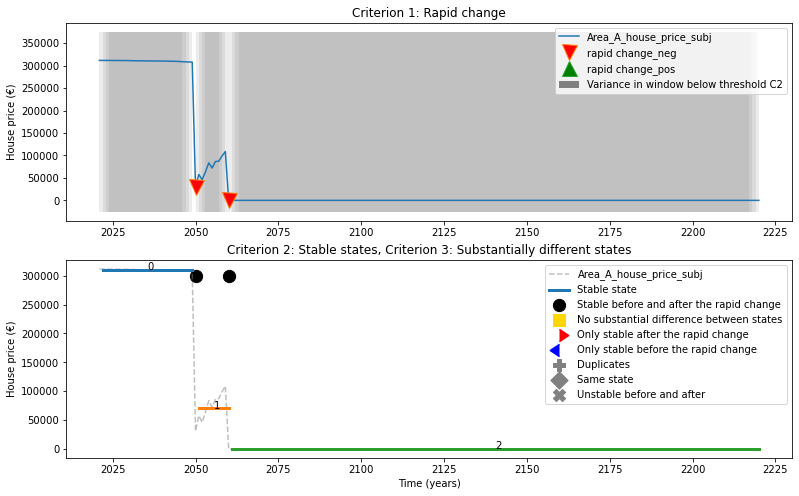

In [17]:
metric = M_sel[15]

metric.find_SETP_candidates(c1=c1,c2=c2,c3=c3, window=window,margin=margin)
print(metric.allSETPs_cands)
metric.select_SETPs(sign=-1)
print(metric.selected_SETPs)
fig, ax = metric.plot_SETPs(window=window,figsize=(13,8))

### RUPTURES - Pruned Exact Linear Time

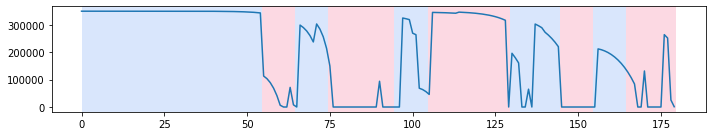

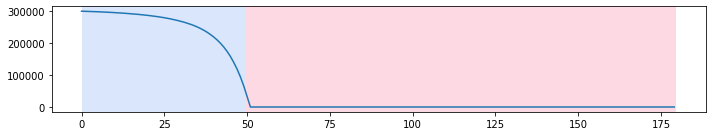

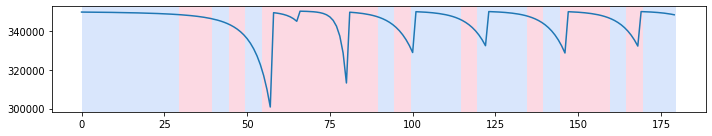

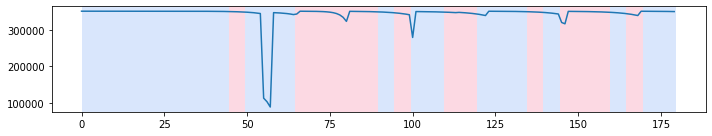

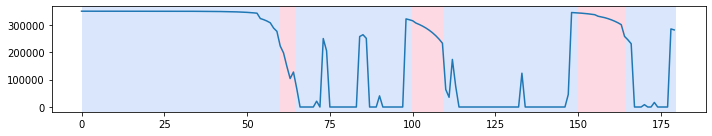

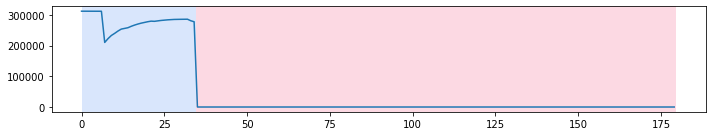

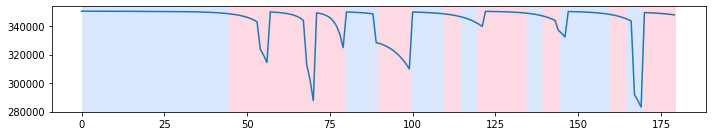

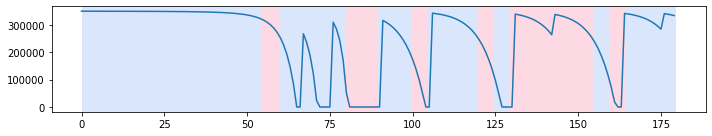

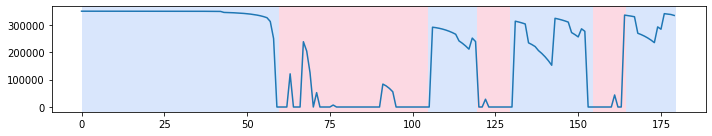

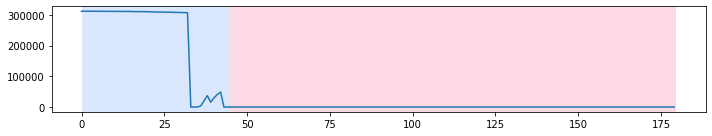

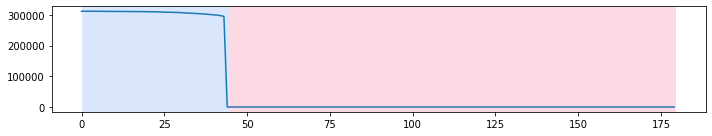

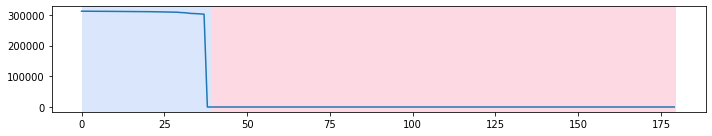

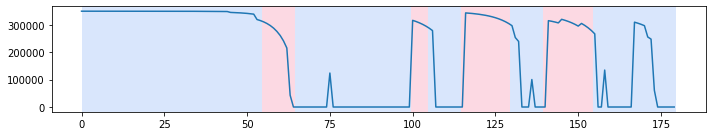

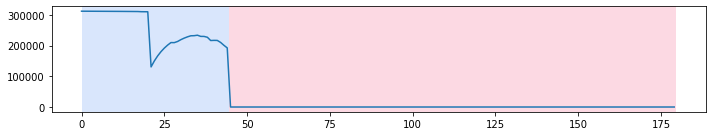

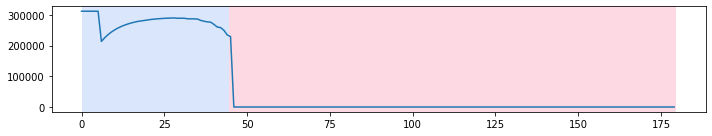

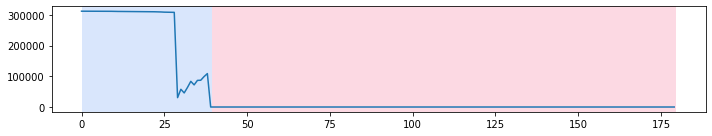

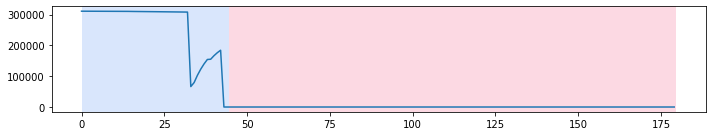

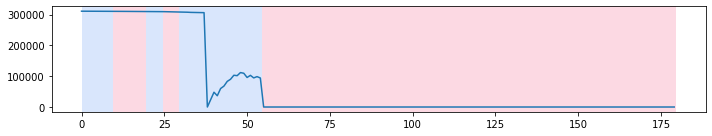

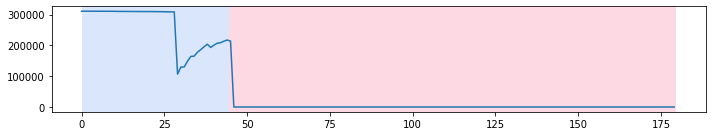

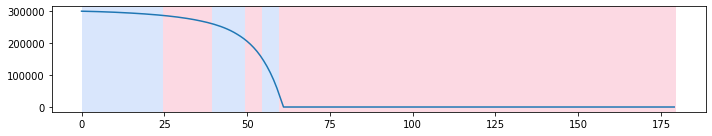

In [64]:
for series in M_sel:
    data
    #RUPTURES PACKAGE
    
    #PELT ANALYSIS Pruned Exact Linear Time
    #Signal
    signal = series.raw[0:180].values

    #Detection
    model = "rbf" # l1, l2, rbf
    min_size = 1 #minimum segement lenghts (years?)
    #jump = 80 #how big should a jump be at least (relates to t-axis???)
    pen = 2 #penalty for overfitting
    algo = rpt.Pelt(model=model,min_size=min_size).fit(signal)
    result = algo.predict(pen=pen)

    #Display
    rpt.display(signal, result)

### Binary change point detection
Documentation: https://github.com/deepcharles/ruptures/blob/master/ruptures/detection/binseg.py

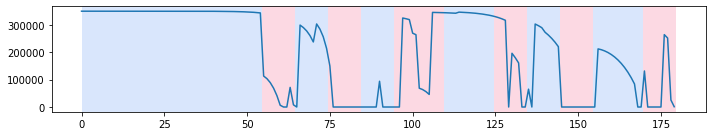

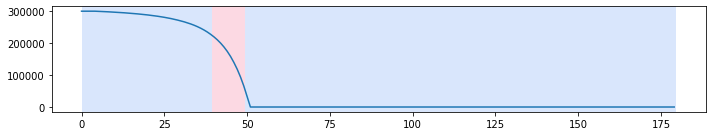

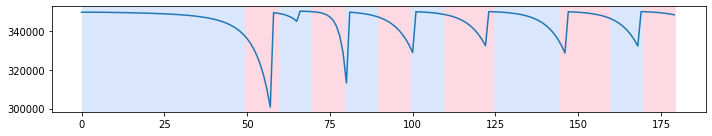

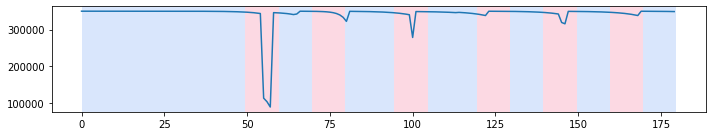

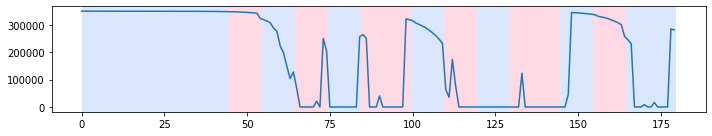

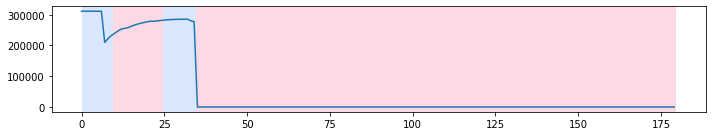

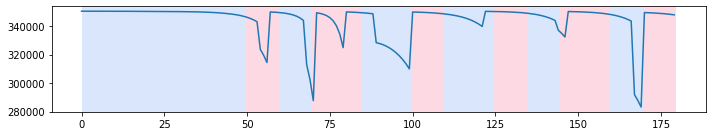

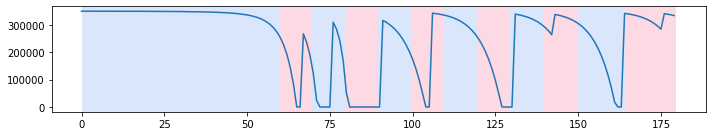

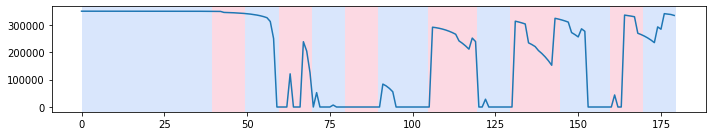

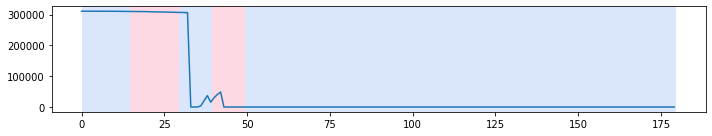

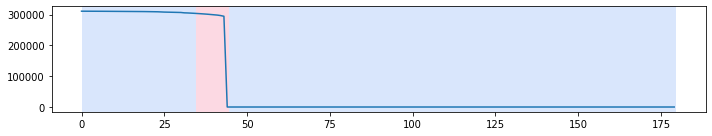

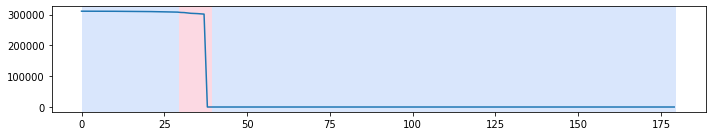

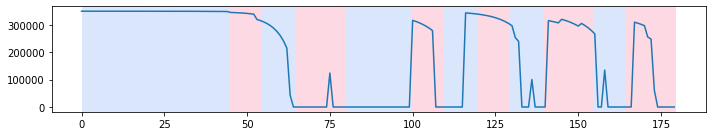

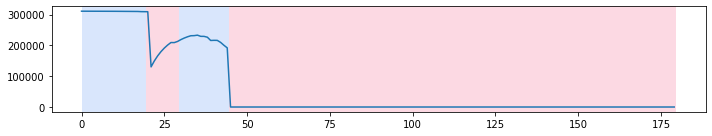

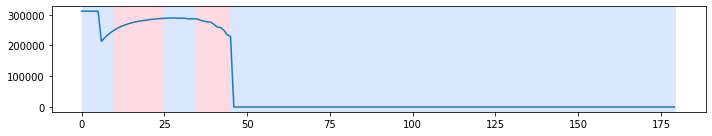

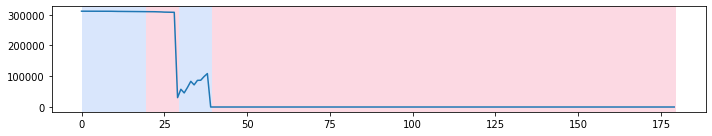

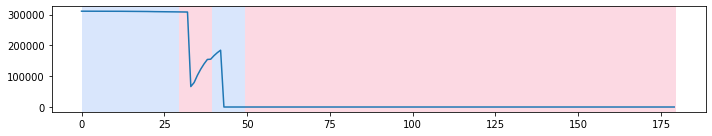

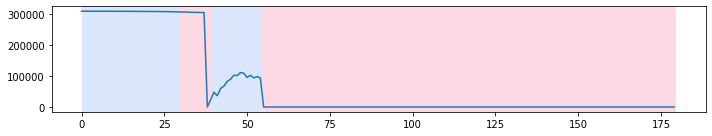

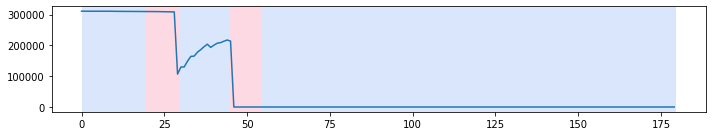

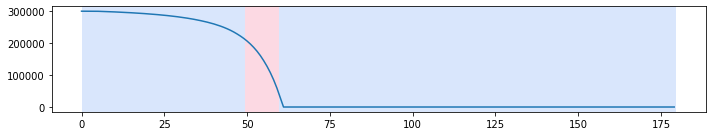

In [84]:
for series in M_sel:
    data
    #RUPTURES PACKAGE
    
    #PELT ANALYSIS
    #Signal
    signal = series.raw[0:180].values

    #Detection
    model = "ar"  # "l1", "rbf", "linear", "normal", "ar"
    pen = 100000 #penalty for overfitting
    min_size=2
    #n_bkps = 3 #number of breakpoints to find before stopping.
    algo = rpt.Binseg(model=model,min_size=min_size).fit(signal)
    result = algo.predict(pen=pen) #n_bkps=n_bkps,

    #Display
    rpt.display(signal, result)

In [7]:
rand = random.choice(sel_experiments)
rand.allMetrics[1].plot_both(figsize=(18,20),exp_name=experiment.name)

NameError: name 'random' is not defined

In [5]:
M = experiment.allMetrics[1]
M

Area_A_house_price_subj

D:\Python\Urban-SETP\classes.py:841: RuntimeWarning: divide by zero encountered in double_scalars
  perc = 100*(avg_a-avg_b)/avg_a


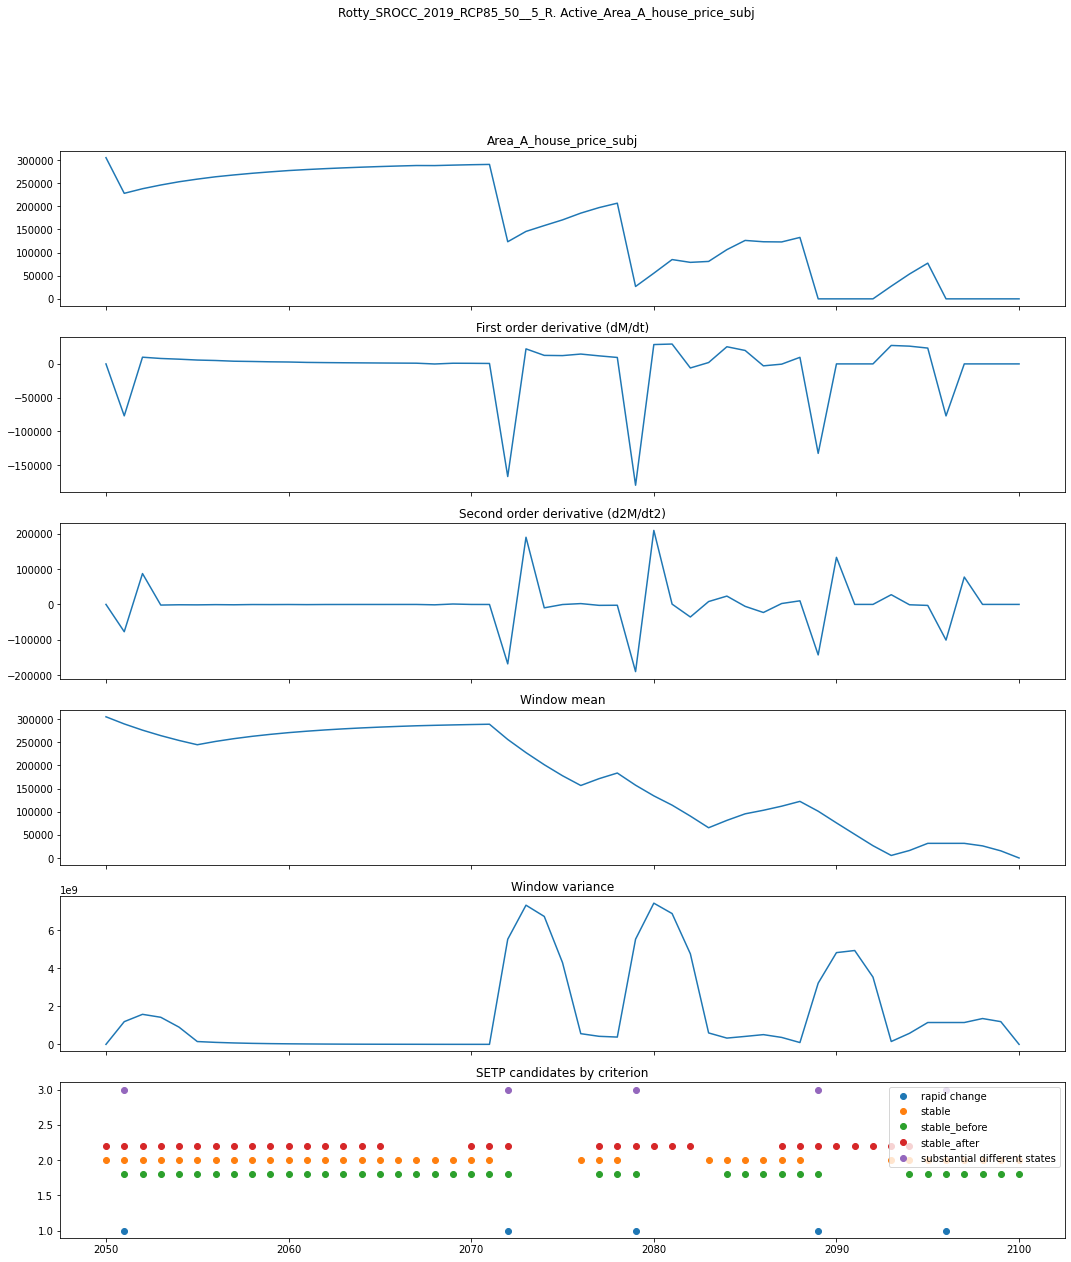

In [8]:
window = 5 #The size of the rolling window
margin = 1 # The margin around the TP
experiment.create_Metrics()
M.create_statistics(domain=(2050,2100),window=window)
M.select_candidates(window=window,margin=margin)    
M.plot_both(figsize=(18,20),exp_name=experiment.name)

### Experiment with K-means

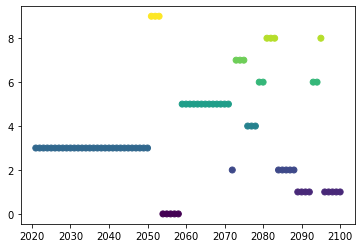

In [44]:
from sklearn.cluster import KMeans
import numpy as np
#K means Clustering 
domain = (2020,2100)

def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

series = M.raw.loc[domain[0]:domain[1]]
data = np.array(series)
data = data.reshape(-1,1)
clust_label, cent = doKmeans(data,nclust=10)
plt.scatter(series.index,clust_label,c=clust_label)